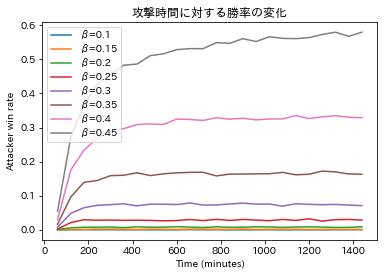

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# bの値のリスト
b_values = ['b01', 'b015', 'b02', 'b025', 'b03', 'b035', 'b04', 'b045']

for b in b_values:
    times = []
    values = []
    
    # ファイル名を生成してデータを読み込む
    for i in range(1, 25):  # 60から1440まで60刻み
        filename = f"../1m/{b}_at{i*60}.csv"
        if os.path.exists(filename):
            data = pd.read_csv(filename)
            # 0列目の最後の行の値を取得
            last_value = data.iloc[-1, 0]
            values.append(last_value)
            times.append(i * 60)
        else:
            print(f"File not found: {filename}")
    
    # bの値をβの値に変換して凡例を設定
    beta_value = float(b[1]+"." +b[2:])  # b01を0.01に変換
    legend_label = f"β={beta_value}"

    # それぞれのbの値についてグラフを描画
    plt.plot(times, values, label=legend_label)

plt.xlabel('Time (minutes)')
plt.ylabel('Attacker win rate')
plt.title('攻撃時間に対する勝率の変化')
plt.legend()
plt.show()
